# Listing 2.1 Loading the MNIST dataset in Keras

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(len(train_images))
print(len(test_images))

60000
10000


In [4]:
print(len(train_labels))
print(len(test_labels))

60000
10000


Label 6


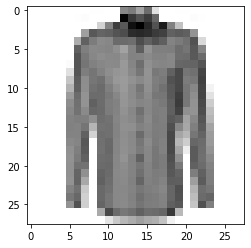

(28, 28)
2


In [5]:
i = 3000
digit = train_images[i]
label = train_labels[i]


import matplotlib.pyplot as plt

print("Label",label)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


print(digit.shape)
print(digit.ndim)

In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Label 9


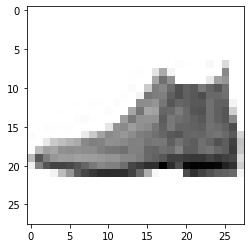

(28, 28)
2


In [7]:
i = 0
digit = test_images[i]
label = test_labels[i]


import matplotlib.pyplot as plt

print("Label",label)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


print(digit.shape)
print(digit.ndim)

In [8]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Listing 2.2 The network architecture

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
(28*28,)

(784,)

In [12]:
digit.shape

(28, 28)

In [13]:
digit.reshape((28*28)).shape

(784,)

# Listing 2.3 The compilation step

In [14]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Listing 2.4 Preparing the image data

In [15]:
# X = Sample
train_images = train_images.reshape((60000, 28 * 28)) # Reshape
train_images = train_images.astype('float32') / 255 # Normalize

test_images = test_images.reshape((10000, 28 * 28)) # Reshape
test_images = test_images.astype('float32') / 255 # Normalize

In [16]:
159/255

0.6235294117647059

In [17]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
train_labels[0]

9

# Listing 2.5 Preparing the labels

In [19]:
# Label = Class
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Now, Train your Model

In [22]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 14ms/step - loss: 0.5551 - accuracy: 0.8012
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.3814 - accuracy: 0.8596
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.3374 - accuracy: 0.8759
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.3119 - accuracy: 0.8850
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.2922 - accuracy: 0.8918


# Now Test your MOdel

In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4487 - accuracy: 0.8530
test_acc: 0.8529999852180481
